In [1]:
import matplotlib.pyplot as plt
from gaussxw import gaussxw,gaussxwab
import numpy as np
%matplotlib qt5

# Exercise 5.17  The Gamma Function

Text(0, 0.5, 'integrand')

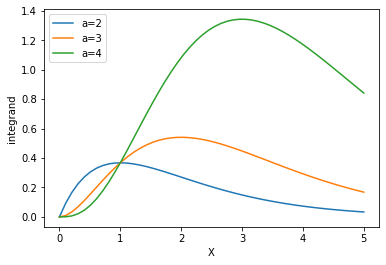

In [169]:
def integrand1(x,a):
    return x**(a-1)*np.exp(-x)
x_val=np.linspace(0,5,50)
a_val=[2,3,4]

for a in a_val:
    func=[integrand(x,a) for x in x_val]
    plt.plot(x_val,func,label=f'a={a}')
plt.legend()
plt.xlabel('X')
plt.ylabel('integrand')
    

In [170]:
N=120
xp,wp=gaussxwab(N,0,1)
def better_integrand(z,a):
    c=a-1
    x=(z*c)/(1-z)
    return np.exp(c*np.log(x)-x)*c/(1-z)**2
def gamma(a):
    integ=0
    for i in range(N):
        integ+=better_integrand(xp[i],a)*wp[i]
    return integ 

C:\Users\VINIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\VINIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


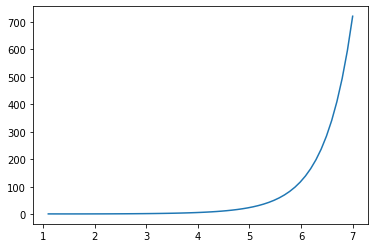

In [171]:
x_val2=np.linspace(1,7,60)
gamma_val=[gamma(x) for x in x_val2 ]
plt.plot(x_val2,gamma_val)

# Exercise 5.21 Electric Field of a Charge Distribution

In [30]:
N=100
plane=np.zeros([N,N])
q1=(50,40)
q2=(50,60)
eps0=8.8541878128e-12
K=1/(np.pi*4*eps0)
Q1=100
Q2=1
def dist(p1,p2):
    x1,y1=p1
    x2,y2=p2
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
def potential(p):
    r1=0.01*dist(p,q1)
    r2=0.01*dist(p,q2)
    pot1=K*Q1/r1
    pot2=K*Q2/r2
    return pot1+pot2



In [31]:
for i in range(100):
    for j in range(100):
        if (i,j)==q1 or (i,j)==q2:
            continue
        else:
            plane[i][j]=potential((i,j))
plane[50][40]=plane.max()
plane[50][60]=plane.max()
            

In [32]:
def pdev(p,var):
    x,y=p
    h=1e-6
    if var=='x':
        x2=x+h
        p2=(x2,y)
        der=(potential(p2)-potential(p))/h
        return der
    if var=='y':
        y2=y+h
        p2=(x,y2)
        der=(potential(p2)-potential(p))/h
        return der
    

In [33]:
plt.figure(dpi=200)
plt.imshow(plane,'afmhot',interpolation='bicubic')


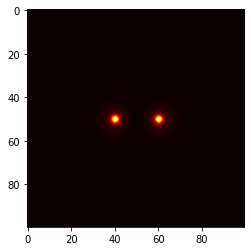

In [200]:
EField=np.zeros([N,N,2])
for i in range(N):
    for j in range(N):
        point=(i,j)
        if point==q1 or point==q2:
            continue
        else:
            EField[i][j][0]=-pdev(point,'x')
            EField[i][j][1]=-pdev(point,'y')
Xmag=EField[:,:,0]
Ymag=EField[:,:,1]
Mag=np.sqrt(Xmag**2+Ymag**2)
Mag[50,40]=Mag.max()
Mag[50,60]=Mag.max()
plt.imshow(Mag,'hot',interpolation='bicubic')

        
        

In [177]:
Xmag[50,40]=1
Ymag[50,40]=1
Xmag[50,60]=1
Ymag[50,60]=1
Xunit=3*Xmag/np.sqrt(Xmag**2+Ymag**2)
Yunit=3*Ymag/np.sqrt(Xmag**2+Ymag**2)

#X=np.linspace(0,99,100)
#Y=X
#plt.figure(dpi=400)
#plt.quiver(np.zeros([N,N]),Xunit,Yunit,units='width')
#plt.imshow(np.sqrt(Yunit**2+Xunit**2))

# Exercise 5.23

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
altitude=np.loadtxt('altitude.txt')
h=30000
def pdx(p):
    y,x=p
    if x==1023:
        pdev=(altitude[y][x]-altitude[y][x-1])/h
        return pdev
    else:
        pdev=(altitude[y][x+1]-altitude[y][x])/h
        return pdev
def pdy(p):
    y,x=p
    if y==511:
        pdev=(altitude[y][x]-altitude[y-1][x])/h
        return pdev
    else:
        pdev=(altitude[y+1][x]-altitude[y][x])/h
        return pdev
pdevs=np.array([[[0. for i in range(2)] for j in range(1024)] for k in range(512)])
for i in range(2):
    for y in range(512):
        for x in range(1024):
            if i==0:
                 pdevs[y][x][i]+=pdx((y,x))
            else:
                pdevs[y][x][i]+=pdy((y,x))

        
    

In [15]:
phi=np.pi/4
def Intensity(p):
    y,x=p
    num=-((np.cos(phi))*pdevs[y][x][0]+(np.sin(phi))*pdevs[y][x][1])
    den=np.sqrt(pdevs[y][x][0]**2+pdevs[y][x][1]**2+1)
    return num/den
I_val=np.zeros((512,1024))
for y in range(512):
    for x in range(1024):
        I_val[y][x]=Intensity((y,x))
        


In [16]:
#plt.imshow(I_val,'Greys',)
#plt.colorbar()
maxm=I_val.max()
minm=I_val.min()
for y in range(512):
    for x in range(1024):
        if I_val[y][x]<0:
            I_val[y][x]=I_val[y][x]/minm
        else:
            I_val[y][x]=I_val[y][x]/maxm
            

In [18]:
plt.imshow(I_val,'viridis',interpolation='bicubic')
plt.colorbar()

In [19]:
altitude=np.loadtxt('stm.txt')
h=2.5
def pdx(p):
    y,x=p
    if x==675:
        pdev=(altitude[y][x]-altitude[y][x-1])/h
        return pdev
    else:
        pdev=(altitude[y][x+1]-altitude[y][x])/h
        return pdev
def pdy(p):
    y,x=p
    if y==662:
        pdev=(altitude[y][x]-altitude[y-1][x])/h
        return pdev
    else:
        pdev=(altitude[y+1][x]-altitude[y][x])/h
        return pdev
pdevs=np.array([[[0. for i in range(2)] for j in range(676)] for k in range(663)])
for i in range(2):
    for y in range(663):
        for x in range(676):
            if i==0:
                 pdevs[y][x][i]+=pdx((y,x))
            else:
                pdevs[y][x][i]+=pdy((y,x))


In [20]:
phi=np.pi/4
def Intensity(p):
    y,x=p
    num=-((np.cos(phi))*pdevs[y][x][0]+(np.sin(phi))*pdevs[y][x][1])
    den=np.sqrt(pdevs[y][x][0]**2+pdevs[y][x][1]**2+1)
    return num/den
I_val=np.zeros((663,676))
for y in range(663):
    for x in range(676):
        I_val[y][x]=Intensity((y,x))
        

In [29]:
plt.imshow(I_val, 'Greys' ,interpolation='bicubic')
plt.colorbar()